# Medicine Recommendation System  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Data Sets\drugsComTest_raw.csv')

In [3]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


### Exploratory Data Analysis

In [4]:
df.shape

(53766, 7)

In [5]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [7]:
df.shape

(53766, 7)

In [8]:
df.nunique()

uniqueID       53766
drugName        2637
condition        708
review         48280
rating            10
date            3566
usefulCount      325
dtype: int64

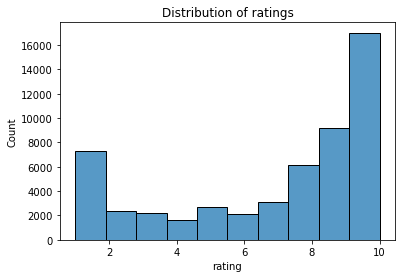

In [9]:
sns.histplot(data=df,x='rating',bins=10)
plt.title('Distribution of ratings')
plt.show()

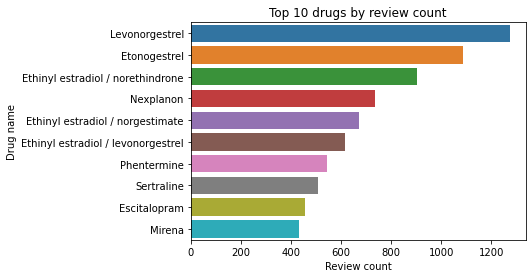

In [10]:
top_drugs=df['drugName'].value_counts().head(10)
sns.barplot(x=top_drugs.values,y=top_drugs.index)
plt.xlabel('Review count')
plt.ylabel('Drug name')
plt.title('Top 10 drugs by review count')
plt.show()

In [11]:
top_drugs

Levonorgestrel                        1273
Etonogestrel                          1085
Ethinyl estradiol / norethindrone      903
Nexplanon                              736
Ethinyl estradiol / norgestimate       673
Ethinyl estradiol / levonorgestrel     615
Phentermine                            542
Sertraline                             508
Escitalopram                           455
Mirena                                 431
Name: drugName, dtype: int64

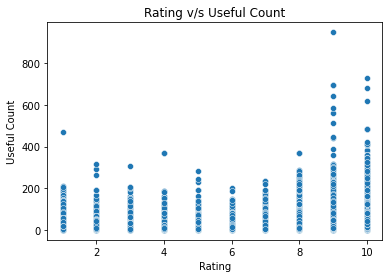

In [12]:
sns.scatterplot(data=df,x='rating',y='usefulCount')
plt.title('Rating v/s Useful Count')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()

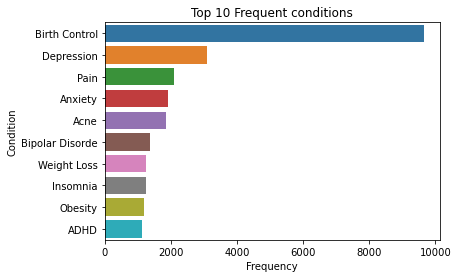

In [13]:
top_conditions=df['condition'].value_counts().head(10)
sns.barplot(x=top_conditions.values,y=top_conditions.index)
plt.title('Top 10 Frequent conditions')
plt.xlabel('Frequency')
plt.ylabel('Condition')
plt.show()

In [14]:
top_conditions

Birth Control      9648
Depression         3095
Pain               2100
Anxiety            1908
Acne               1847
Bipolar Disorde    1380
Weight Loss        1248
Insomnia           1231
Obesity            1189
ADHD               1126
Name: condition, dtype: int64

In [15]:
def get_medications_for_condition(condition):
    medications = df[df['condition'] == condition]['drugName'].unique()#.head(5)
    print(medications)

In [16]:
get_medications_for_condition('Birth Control')

['Cyclafem 1 / 35' 'Copper' 'Levora' 'Blisovi Fe 1 / 20' 'NuvaRing'
 'Aubra' 'Ethinyl estradiol / etonogestrel' 'Microgestin Fe 1.5 / 30'
 'Etonogestrel' 'Ortho Tri-Cyclen Lo' 'Skyla'
 'Ethinyl estradiol / norethindrone' 'ParaGard'
 'Ethinyl estradiol / levonorgestrel' 'Aviane' 'Implanon' 'Levonorgestrel'
 'Ethinyl estradiol / norgestimate' 'Lo Loestrin Fe' 'Yaz' 'Jolessa'
 'Nexplanon' 'Kariva' 'Depo-Provera' 'Safyral'
 'Drospirenone / ethinyl estradiol' 'Microgestin Fe 1 / 20' 'Apri'
 'Ortho Evra' 'Alesse' 'Junel Fe 1 / 20' 'Mirena' 'Tri-Sprintec'
 'Junel Fe 1.5 / 30' 'Chateal' 'Ethinyl estradiol / norelgestromin'
 'Sprintec' 'Mononessa' 'Xulane' 'Desogestrel / ethinyl estradiol' 'Zovia'
 'Ortho Cyclen' 'TriNessa' 'Kyleena' 'Medroxyprogesterone' 'Tri-Previfem'
 'Enskyce' 'Dienogest / estradiol' 'Minastrin 24 Fe' 'Mibelas 24 Fe'
 'Portia' 'Ethinyl estradiol / norgestrel' 'Liletta' 'Ortho Micronor'
 'Yasmin' 'Larin Fe 1.5 / 30' 'Lutera'
 'Drospirenone / ethinyl estradiol / levomefolate 

### Model Training

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = df[['drugName', 'condition']]

df.dropna(subset=['condition'], inplace=True)


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['condition'])


user_condition = input("Enter your health condition: ")


user_condition_tfidf = tfidf_vectorizer.transform([user_condition])


similarity_scores = cosine_similarity(user_condition_tfidf, tfidf_matrix)


top_indices = similarity_scores.argsort()[0][::-1]

top_medicines = df['drugName'].iloc[top_indices]

print("Top recommended medicines for", user_condition, ":")
for medicine in top_medicines:
    print(medicine)


C:\Users\Saketh Chintalapudi\AppData\Local\Temp\ipykernel_7968\1083468106.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['condition'], inplace=True)


Enter your health condition: Acne
Top recommended medicines for Acne :
Isotretinoin
Ortho Tri-Cyclen
Duac
Monodox
Adoxa
Isotretinoin
Benzoyl peroxide / clindamycin
Minocycline
Adapalene
Clindamycin
Epiduo
Accutane
Benzoyl peroxide / clindamycin
Benzoyl peroxide / clindamycin
Gianvi
Yasmin
Differin
Differin
Yasmin
Benzoyl peroxide / clindamycin
Spironolactone
Adapalene
Doxycycline
Epiduo
Drospirenone / ethinyl estradiol
Adapalene / benzoyl peroxide
Epiduo
Doxycycline
Minocycline
Loestrin 24 Fe
Differin
Benzoyl peroxide / clindamycin
Minocycline
Differin
Tretinoin
Benzoyl peroxide / clindamycin
Isotretinoin
Accutane
Ethinyl estradiol / norethindrone
Clindamycin
Dapsone
Differin
Minocycline
Adapalene
Duac
Duac
Clindamycin / tretinoin
Doxycycline
Sulfacetamide sodium / sulfur
Sulfamethoxazole / trimethoprim
Acanya
Isotretinoin
Isotretinoin
Epiduo
Adapalene / benzoyl peroxide
Aczone
Adapalene / benzoyl peroxide
TriNessa
Isotretinoin
Isotretinoin
Isotretinoin
Dapsone
Clindamycin
Minocycline


Sertraline
Atomoxetine
Ethinyl estradiol / norethindrone
Telmisartan
Nexplanon
Suboxone
Lyrica
Yaz
Roxicodone
Vilazodone
Sertraline
Bupropion
Miconazole
Crestor
Senna
Implanon
Phentermine
Tarka
Cialis
Duloxetine
Ethinyl estradiol / etonogestrel
Chantix
Valtrex
Atenolol / chlorthalidone
Liraglutide
Famotidine / ibuprofen
Camrese
Levofloxacin
Bisacodyl
Oseltamivir
Metformin
Omalizumab
Tegretol XR
Clonazepam
Evekeo
Tapentadol
Adderall
Quetiapine
Amphetamine / dextroamphetamine
ella
Metaxalone
Ortho Evra
Clonidine
Acamprosate
Effexor XR
Etonogestrel
Ethinyl estradiol / levonorgestrel
Nebivolol
Macrobid
Levonorgestrel
ParaGard
Mirena
Suprep Bowel Prep Kit
Bupropion / naltrexone
Acetaminophen / hydrocodone
Levitra
Ethinyl estradiol / norethindrone
Hydrochlorothiazide / olmesartan
Certolizumab
Aluminum chloride hexahydrate
Metoprolol
Ethinyl estradiol / levonorgestrel
Doxylamine
Zyrtec
Sertraline
Alprazolam
Gildess Fe 1 / 20
Levothyroxine
Celexa
Cyclobenzaprine
Buprenorphine / naloxone
Viberz

Terbinafine
Zoloft
Buprenorphine / naloxone
Sertraline
Pristiq
Eslicarbazepine
Bupropion
Yaz
Buprenorphine / naloxone
Cymbalta
Etonogestrel
Vyvanse
Aluminum chloride hexahydrate
Denosumab
Benzonatate
Effexor XR
Pylera
Benzocaine
Metronidazole
Sprintec
Lorcaserin
Ethinyl estradiol / levonorgestrel
Phentermine
Ethinyl estradiol / norethindrone
Phentermine
Pristiq
Ethinyl estradiol / norgestimate
Lorazepam
Eluxadoline
Atomoxetine
Provera
Cymbalta
Azithromycin
Byetta
Oxistat
Mibelas 24 Fe
Bismuth subcitrate potassium / metronidazole / tetracycline
Copper
Symbyax
Bystolic
Viberzi
Etonogestrel
Sertraline
Lisdexamfetamine
Loestrin 24 Fe
ParaGard
Sprintec
Olopatadine
Alfuzosin
Strattera
Zolpidem
Bupropion / naltrexone
Metformin
Nitrofurantoin
Quetiapine
Quetiapine
Drysol
Pregabalin
Abilify
Tirosint
Irbesartan
Ethinyl estradiol / levonorgestrel
Tiotropium
BuSpar
Silodosin
Nortriptyline
Catapres
Belviq
Nuvigil
Mononessa
Levonorgestrel
Tiotropium
Ethinyl estradiol / norethindrone
Sumatriptan
Preg

CellCept
Varenicline
Metronidazole
Trazodone
Sildec-PE DM
Mirena
Trospium
Dicyclomine
Ethinyl estradiol / levonorgestrel
Desvenlafaxine
Vilazodone
Fluoxetine
Fluticasone / salmeterol
Belviq
Ethinyl estradiol / norethindrone
Plan B
Sertraline
Methylphenidate
TriNessa
Amcinonide
Benzonatate
Eslicarbazepine
Methylphenidate
Buprenorphine
Estrace Vaginal Cream
Etonogestrel
Aspirin / meprobamate
Zolpidem
Metronidazole
Phosphorated carbohydrate solution
Ethinyl estradiol / levonorgestrel
Varenicline
Cimzia
Ethinyl estradiol / norgestimate
Sumatriptan
Buprenorphine / naloxone
Thyroid desiccated
Paroxetine
Venlafaxine
Concerta
Lo Loestrin Fe
Desvenlafaxine
Chantix
Zolpidem
Levonorgestrel
Topiramate
Xanax
Fastin
Diflucan
Fluoxetine
Gabapentin
Prozac
Nitrofurantoin
Lamotrigine
Clonazepam
Zyrtec
Lisdexamfetamine
Neurontin
Implanon
Azithromycin
Etonogestrel
Lorazepam
Nexplanon
Testim
Naproxen
Loestrin 24 Fe
Lubiprostone
Phentermine
Lupron
Mirtazapine
Naproxen
Ethinyl estradiol / norgestimate
Clonaz

Methylphenidate
Beyaz
Vortioxetine
Nexplanon
Skyla
Letrozole
Contrave
Pregabalin
Wellbutrin XL
Prolia
Levoxyl
Enablex
Monistat 3-Day Combination Pack
Levonorgestrel
Delatestryl
Levonorgestrel
Remicade
Alprazolam
Depo-Provera
Pristiq
Nitrofurantoin
Microgestin Fe 1 / 20
Phentermine
Mirtazapine
Acetaminophen / oxycodone
Depo-Provera
Rapaflo
Phentermine
Insulin glargine
Desipramine
Desogestrel / ethinyl estradiol
Lorcaserin
Paroxetine
Monistat 3-Day Combination Pack
Sulfamethoxazole / trimethoprim
Polyethylene glycol 3350 with electrolytes
Harvoni
Simply Sleep
Bupropion
Mirtazapine
Tioconazole
BuSpar
Quetiapine
Desogestrel / ethinyl estradiol
Ethinyl estradiol / levonorgestrel
Norethindrone
Miconazole
Duloxetine
Fluoxetine
Dexmethylphenidate
Amoxicillin / clavulanate
Clonazepam
Zyban
Jentadueto
Clonazepam
Tarina Fe 1 / 20
Cymbalta
Nexplanon
Quetiapine
Wellbutrin XL
Acetaminophen / hydrocodone
Desvenlafaxine
Pregabalin
Citalopram
Propofol
Escitalopram
Vortioxetine
Epclusa
Mirtazapine
Metro

Cialis
Panlor DC
Atorvastatin
Endocet
Hiprex
Tamsulosin
Lyrica
Letrozole
Testosterone
Duloxetine
Terbinafine
Propranolol
Propranolol
Metformin
Clonazepam
Plan B
Avanafil
Ethinyl estradiol / norgestimate
Sertraline
Suprep Bowel Prep Kit
Microgestin Fe 1 / 20
Sertraline
Ubiquinone
Nexium
Advil Cold and Sinus
Amoxicillin / clavulanate
Prozac
Levonorgestrel
Levonorgestrel
Scopolamine
Metronidazole
Ativan
Deplin
Sulfamethoxazole / trimethoprim
Etanercept
Botox
Tapentadol
Zyrtec
Etonogestrel
Carbamazepine
Paroxetine
Miconazole
Avelox
Dulcolax
Losartan
Mirtazapine
Macrobid
Ciprofloxacin / dexamethasone
Microgestin Fe 1.5 / 30
NoDoz
Tioconazole
Duloxetine
TriCor
Cryselle
Metoclopramide
Ortho Micronor
Quetiapine
Nexplanon
Lactulose
Buprenorphine / naloxone
Meclizine
Diclofenac
Buspirone
Guaifenesin / pseudoephedrine
NuvaRing
Lovastatin
Contrave
Tramadol
Ethinyl estradiol / levonorgestrel
Enoxaparin
Omeprazole
Belviq
Levonorgestrel
Lamotrigine
Levonorgestrel
Elavil
Gilenya
Remicade
Fesoterodine


Mirena
Levonorgestrel
Clonazepam
Bupropion / naltrexone
Abilify
Doxepin
Ethinyl estradiol / norethindrone
Etonogestrel
Ziprasidone
NoDoz
Pramipexole
Carac
Ethinyl estradiol / norgestimate
Skyla
Levonorgestrel
Miconazole
Alprazolam
Propranolol
Nexplanon
Lorazepam
Phentermine / topiramate
Apri
Metformin
Levonorgestrel
Edex
GoLYTELY
Chantix
Guaifenesin / pseudoephedrine
Blisovi 24 Fe
Lisinopril
Maxalt-MLT
Goserelin
Harvoni
Quetiapine
Ethinyl estradiol / levonorgestrel
Nuvigil
Effexor XR
Tizanidine
Elocon
Orlistat
Testosterone
Dilaudid
Nucynta
Drospirenone / ethinyl estradiol
Metronidazole
Ethinyl estradiol / levonorgestrel
Propofol
Levonorgestrel
Febuxostat
Mobic
Medroxyprogesterone
Mirabegron
Finasteride
Paroxetine
Alavert D-12 Hour Allergy and Sinus
Metformin
Bisacodyl
Abreva
Zoloft
Drospirenone / ethinyl estradiol
Ambien
Levonorgestrel
Norco
Lorcaserin
Venlafaxine
Humira
Abilify
Levonorgestrel
Sulfamethoxazole / trimethoprim
Nexplanon
Bisacodyl
Ciclesonide
Mirabegron
Lyrica
Dulaglutide

Magnesium hydroxide
Lorcaserin
Saxenda
Luvox
Clonazepam
Safyral
Ethinyl estradiol / etonogestrel
Desogestrel / ethinyl estradiol
Orajel
Methylnaltrexone
Levothyroxine
Clindamycin
Lorcaserin
Adalimumab
Etonogestrel
Junel Fe 1.5 / 30
Eszopiclone
Hydrochlorothiazide
Nexplanon
Oseltamivir
Quetiapine
Liraglutide
Mirena
Bydureon
Capsaicin
Citalopram
NuvaRing
Pregabalin
Risperidone
Mirena
Evekeo
Norco
Microgestin Fe 1 / 20
Junel Fe 1 / 20
Lexapro
Alprazolam
Clonazepam
Lexapro
Miconazole
Zoloft
Metronidazole
Maxifed DM
Soolantra
Portia
Etonogestrel
Alprazolam
Vyvanse
Lisdexamfetamine
Harvoni
Tadalafil
Reglan
Olopatadine
Adipex-P
Mucinex D
Tri-Sprintec
Valtrex
Provera
Diclofenac
Suboxone
Next Choice
Olanzapine
Fluoxetine
Levonorgestrel
Trintellix
Diltiazem
Levonorgestrel
Trazodone
Fioricet
Desvenlafaxine
Azor
Trulicity
Carisoprodol
Liraglutide
Lexapro
Divalproex sodium
Promethazine
Lisdexamfetamine
Moxifloxacin
Lamictal
Ethinyl estradiol / norethindrone
Hydroxyzine
Valacyclovir
Levonorgestrel
T

Ezetimibe
Valtrex
Levonorgestrel
Miconazole
Clarithromycin
Phenergan
Plavix
GaviLyte-G
Duloxetine
Ketorolac
Flecainide
Fluoxetine
Suvorexant
Xalatan
Suvorexant
Septra
Lorcaserin
Ethinyl estradiol / norethindrone
Stelara
Atomoxetine
Pristiq
Ethinyl estradiol / norelgestromin
Prepopik
Clobetasol
Polyethylene glycol 3350 with electrolytes
Cymbalta
Qsymia
Lurasidone
Nexplanon
Ribavirin
Lurasidone
Diovan HCT
Vyvanse
Zyprexa
Miconazole
Provigil
Lorzone
Blisovi 24 Fe
Acetaminophen / hydrocodone
Effexor XR
Ethinyl estradiol / norgestimate
Tramadol
Diclofenac
Plan B One-Step
Ritalin
Vicoprofen
Cefdinir
Gleevec
Chantix
Gabapentin
Nuvigil
Acyclovir
Cymbalta
Gabapentin
CamreseLo
Ethinyl estradiol / etonogestrel
Acamprosate
Effexor XR
Depo-Provera
Varenicline
Cyclosporine
Acetaminophen / butalbital / caffeine
Ethinyl estradiol / levonorgestrel
Aripiprazole
Flector Patch
Eluxadoline
Acetaminophen / oxycodone
Butorphanol
Provigil
Etonogestrel
Sodium hyaluronate
Aviane
Desvenlafaxine
Levonorgestrel
Ph

Taclonex
Viorele
Amitriptyline
Hydromorphone
Metformin
Tadalafil
Valtrex
Doxycycline
Ethinyl estradiol / norgestimate
Namenda
Levonorgestrel
Etonogestrel
Varenicline
Etonogestrel
Quetiapine
Methylprednisolone
Risperidone
Belviq
Nitrofurantoin
Ethinyl estradiol / levonorgestrel
Diethylpropion
Intuniv
Methocarbamol
Levonorgestrel
Toprol-XL
Amphetamine / dextroamphetamine
Varenicline
Sanctura
Aricept
Magnesium sulfate / potassium sulfate / sodium sulfate
Skyla
Vyvanse
Yaz
Acetaminophen / aspirin / caffeine
Sprintec
Simponi
Escitalopram
Skyla
TriNessa
Pramipexole
Implanon
Linzess
Bupropion / naltrexone
Testim
Lyrica
Lutera
Promethazine
Sulfamethoxazole / trimethoprim
Cefdinir
Suboxone
Meloxicam
Escitalopram
Belsomra
Levonorgestrel
Venlafaxine
Bisoprolol / hydrochlorothiazide
Glucotrol
Bydureon
Seroquel XR
Escitalopram
Entresto
Mesalamine
Implanon
Oxymetazoline
Nexplanon
Levonorgestrel
Metronidazole
Depo-Provera
Miconazole
Leuprolide
Norco
Magnesium sulfate / potassium sulfate / sodium sulf

Effexor
Mirena
Percocet
Levitra
Carisoprodol
Etonogestrel
Etonogestrel
Azelex
Skyla
Clonidine
Prazosin
Varenicline
Vyvanse
Chantix
Sprintec
Luvox
Ibandronate
Norco
Bunavail
Symax Duotab
Tioconazole
Norethindrone
Duragesic
Dulaglutide
Implanon
Drospirenone / ethinyl estradiol
Nexplanon
Montelukast
Implanon
Zoloft
Sertraline
Armour Thyroid
Nubain
Privine
Stribild
Betamethasone / calcipotriene
Oxybutynin
Temazepam
Methylprednisolone
Wellbutrin
Drospirenone / ethinyl estradiol
Drospirenone / ethinyl estradiol
Lupron Depot
Etonogestrel
Zyprexa
Medroxyprogesterone
Treximet
Nebivolol
Actos
Bupropion / naltrexone
Tramadol
Oxycodone
Bupropion
Desogestrel / ethinyl estradiol
Olanzapine
Ativan
Hydroxyprogesterone
Etonogestrel
Lexapro
Xanax
Naproxen
Levaquin
Sprintec
Lipitor
Levonorgestrel
Sertraline
Sertraline
Plan B
Levonorgestrel
Magnesium sulfate / potassium sulfate / sodium sulfate
Diphenhydramine
Gabapentin
Nexplanon
Hyaluronan
ParaGard
Savella
Plan B One-Step
Levonorgestrel
Magnesium sulfat

Propofol
Simply Sleep
Trazodone
Trazodone
Abilify
Copper
Bupropion / naltrexone
Varenicline
Savella
Phentermine
ParaGard
Valtrex
Acetaminophen / hydrocodone
Ethinyl estradiol / norelgestromin
Nexplanon
Chlorzoxazone
Varenicline
Denosumab
Lisdexamfetamine
Sertraline
Movantik
Hylan g-f 20
Hydrocodone / ibuprofen
Vicoprofen
Fluconazole
Lubiprostone
Phentermine
Desogestrel / ethinyl estradiol
Viibryd
Magnesium sulfate / potassium sulfate / sodium sulfate
Levaquin
Multivitamin, prenatal
Tramadol
Taytulla
Atorvastatin
Ethinyl estradiol / etonogestrel
Alprazolam
Etonogestrel
Nicotine
Medroxyprogesterone
Levonorgestrel
Cipro
Tapentadol
Varenicline
Levonorgestrel
Ethinyl estradiol / norethindrone
Zoloft
Victoza
Vyvanse
Testosterone
Ethinyl estradiol / levonorgestrel
Vraylar
Gabapentin
Quetiapine
Tioconazole
Topiramate
Liraglutide
Lamotrigine
Cymbalta
Chantix
Phentermine
Suprep Bowel Prep Kit
Ciclopirox
Bupropion
Ciprofloxacin
Nexplanon
Zoloft
Phentermine / topiramate
Phentermine
Venlafaxine
Eth

Losartan
Canagliflozin
Talwin Nx
Ethinyl estradiol / norelgestromin
Zirgan
Norethindrone
Liraglutide
Nexplanon
Carvedilol
Imiquimod
Pristiq
Propranolol
Zolpidem
Oxazepam
Keppra
Cymbalta
Prolia
Methotrexate
Jalyn
Metformin
Ciprofloxacin
Tapentadol
Implanon
Magnesium sulfate / potassium sulfate / sodium sulfate
Mirtazapine
Divalproex sodium
Ampyra
Leflunomide
Epclusa
Tioconazole
Carbamazepine
Risperidone
Miconazole
GaviLyte-N
Lunesta
Gabapentin
Plan B One-Step
Meloxicam
Bystolic
Prevpac
Aripiprazole
Zoloft
Venlafaxine
Ortho-Novum 7 / 7 / 7
Mirtazapine
Lamotrigine
Ethinyl estradiol / norethindrone
Minoxidil
Fentanyl
Zoloft
Baclofen
Ketorolac
Atorvastatin
Pradaxa
Phentermine
Estradiol
Zyrtec
Venlafaxine
Zoloft
Pristiq
Oxycodone
Monistat 7-Day Combination Pack
Ethinyl estradiol / norgestimate
Amoxicillin / clavulanate
Carbidopa / levodopa
Gabapentin
Certolizumab
Metformin
Miconazole
Savella
Miconazole
Propranolol
Mirtazapine
Etonogestrel
Aviane
Lamotrigine
Mirena
Celecoxib
Tadalafil
Adderal

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


df = df[['drugName', 'condition']]

df.dropna(subset=['condition'], inplace=True)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['condition'])

user_condition = input("Enter your health condition: ")

user_condition_tfidf = tfidf_vectorizer.transform([user_condition])

similarity_scores = cosine_similarity(user_condition_tfidf, tfidf_matrix)

top_indices = similarity_scores.argsort()[0][::-1][:10]  # Select top 10 indices

top_medicines = df['drugName'].iloc[top_indices]

print("Top 10 recommended medicines for", user_condition, ":")
for medicine in top_medicines:
    print(medicine)


Enter your health condition: Acne
Top 10 recommended medicines for Acne :
Isotretinoin
Ortho Tri-Cyclen
Duac
Monodox
Adoxa
Isotretinoin
Benzoyl peroxide / clindamycin
Minocycline
Adapalene
Clindamycin
